# Part 1: (Select models and train on our data)

The concept here is to actually build 3 different models to demonstrate understanding in the class as well as have multiple options to compare for accuracy. If we have time I would also like to do a 4th with a Neural network to compare modern tech against classsic machine learning accuracy.

### Verify the Correct Conda Environment and Pytorch is GPU ready!

In [23]:
# check the path to ensure you are working from the correct Conda Env.
!which python
# check that Pytorch is instlaled and accessible
import torch
print(torch.__version__)
# check that Pytorch is GPU ready
pass

/home/puma/anaconda3/envs/data_science_env/bin/python


ModuleNotFoundError: No module named 'torch'

### Logistic Regression:

In [11]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Create a dedicated folder for the logistic regression model
model_folder = '../models/logistic_regression/'
os.makedirs(model_folder, exist_ok=True)

# File paths for model and preprocessor
model_output_path = os.path.join(model_folder, 'logistic_regression_model.joblib')
preprocessor_output_path = os.path.join(model_folder, 'preprocessor.joblib')

# File paths for processed data
training_data_path = '../data_processed/all_states/all_states_training.csv'
validation_data_path = '../data_processed/all_states/all_states_validation.csv'

# Load the training and validation datasets
train_data = pd.read_csv(training_data_path)
val_data = pd.read_csv(validation_data_path)

# Separate features and target for training and validation
X_train = train_data.drop(columns=['Election Result'])
y_train = train_data['Election Result']
X_val = val_data.drop(columns=['Election Result'])
y_val = val_data['Election Result']

# Define categorical and numerical columns
categorical_features = ['State']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# One-Hot Encode the State feature and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical data
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode 'State'
    ]
)

# Apply transformations to both training and validation datasets
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Create and train the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_transformed, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val_transformed)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

# Save the trained model
dump(model, model_output_path)
print(f"Trained model saved to {model_output_path}")

# Save the fitted preprocessor
dump(preprocessor, preprocessor_output_path)
print(f"Preprocessor saved to {preprocessor_output_path}")


Validation Accuracy: 0.8500
              precision    recall  f1-score   support

           0       0.82      0.94      0.87        33
           1       0.91      0.74      0.82        27

    accuracy                           0.85        60
   macro avg       0.86      0.84      0.84        60
weighted avg       0.86      0.85      0.85        60

Trained model saved to ../models/logistic_regression/logistic_regression_model.joblib
Preprocessor saved to ../models/logistic_regression/preprocessor.joblib


### k-Nearest Neighbors:

In [12]:
import os
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Create a dedicated folder for the k-NN model
model_folder = '../models/k_nearest_neighbors/'
os.makedirs(model_folder, exist_ok=True)

# File paths for model and preprocessor
model_output_path = os.path.join(model_folder, 'k_nearest_neighbors_model.joblib')
preprocessor_output_path = os.path.join(model_folder, 'preprocessor.joblib')

# File paths for processed data
training_data_path = '../data_processed/all_states/all_states_training.csv'
validation_data_path = '../data_processed/all_states/all_states_validation.csv'

# Load the training and validation datasets
train_data = pd.read_csv(training_data_path)
val_data = pd.read_csv(validation_data_path)

# Separate features and target for training and validation
X_train = train_data.drop(columns=['Election Result'])
y_train = train_data['Election Result']
X_val = val_data.drop(columns=['Election Result'])
y_val = val_data['Election Result']

# Define categorical and numerical columns
categorical_features = ['State']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# One-Hot Encode the State feature and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical data
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode 'State'
    ]
)

# Apply transformations to both training and validation datasets
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Create and train the k-NN model
k = 3  # Number of neighbors; adjust based on tuning
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train_transformed, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val_transformed)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

# Save the trained model
dump(model, model_output_path)
print(f"Trained model saved to {model_output_path}")

# Save the fitted preprocessor
dump(preprocessor, preprocessor_output_path)
print(f"Preprocessor saved to {preprocessor_output_path}")



Validation Accuracy: 0.8167
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        33
           1       0.90      0.67      0.77        27

    accuracy                           0.82        60
   macro avg       0.84      0.80      0.81        60
weighted avg       0.83      0.82      0.81        60

Trained model saved to ../models/k_nearest_neighbors/k_nearest_neighbors_model.joblib
Preprocessor saved to ../models/k_nearest_neighbors/preprocessor.joblib


### Decision tree:

In [13]:
import os
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump

# Create a dedicated folder for the Decision Tree model
model_folder = '../models/decision_tree/'
os.makedirs(model_folder, exist_ok=True)

# File paths for model and preprocessor
model_output_path = os.path.join(model_folder, 'decision_tree_model.joblib')
preprocessor_output_path = os.path.join(model_folder, 'preprocessor.joblib')

# File paths for processed data
training_data_path = '../data_processed/all_states/all_states_training.csv'
validation_data_path = '../data_processed/all_states/all_states_validation.csv'

# Load the training and validation datasets
train_data = pd.read_csv(training_data_path)
val_data = pd.read_csv(validation_data_path)

# Separate features and target for training and validation
X_train = train_data.drop(columns=['Election Result'])
y_train = train_data['Election Result']
X_val = val_data.drop(columns=['Election Result'])
y_val = val_data['Election Result']

# Define categorical and numerical columns
categorical_features = ['State']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# One-Hot Encode the State feature and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical data
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode 'State'
    ]
)

# Apply transformations to both training and validation datasets
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Create and train the Decision Tree model
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)  # Adjust `max_depth` for tree complexity
model.fit(X_train_transformed, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val_transformed)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(y_val, y_pred))

# Save the trained model
dump(model, model_output_path)
print(f"Trained model saved to {model_output_path}")

# Save the fitted preprocessor
dump(preprocessor, preprocessor_output_path)
print(f"Preprocessor saved to {preprocessor_output_path}")

# Visualize the tree structure
# Ensure feature names are aligned with the one-hot encoding
feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)
print("\nDecision Tree Structure:")
print(export_text(model, feature_names=feature_names))


Validation Accuracy: 0.6167
              precision    recall  f1-score   support

           0       0.63      0.73      0.68        33
           1       0.59      0.48      0.53        27

    accuracy                           0.62        60
   macro avg       0.61      0.60      0.60        60
weighted avg       0.61      0.62      0.61        60

Trained model saved to ../models/decision_tree/decision_tree_model.joblib
Preprocessor saved to ../models/decision_tree/preprocessor.joblib

Decision Tree Structure:
|--- % with Bachelor's Degree or Higher <= 0.41
|   |--- % with Bachelor's Degree or Higher <= -1.15
|   |   |--- class: 0
|   |--- % with Bachelor's Degree or Higher >  -1.15
|   |   |--- Population <= -0.77
|   |   |   |--- class: 0
|   |   |--- Population >  -0.77
|   |   |   |--- Population <= -0.68
|   |   |   |   |--- % Without Healthcare Coverage <= -0.17
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- % Without Healthcare Coverage >  -0.17
|   |   |   |   |   

### Random Forest

Validation Accuracy: 0.7
Classification Report:
              precision    recall  f1-score   support

    Democrat       0.67      0.88      0.76        33
  Republican       0.76      0.48      0.59        27

    accuracy                           0.70        60
   macro avg       0.72      0.68      0.68        60
weighted avg       0.72      0.70      0.69        60

Random Forest AUC: 0.8996


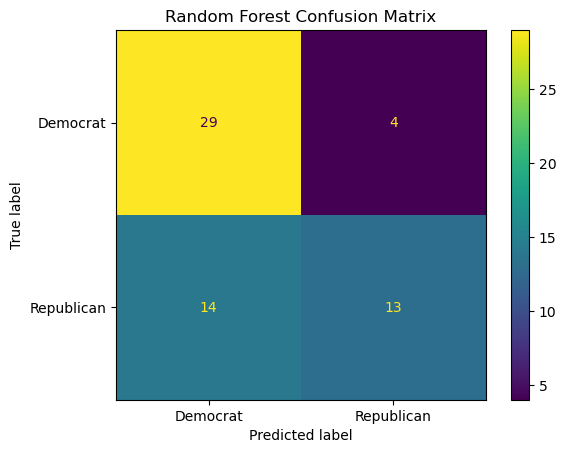

Feature Importances:
                                    Importance
% with Bachelor's Degree or Higher    0.211071
Median Household Income               0.129083
% Without Healthcare Coverage         0.111916
Population                            0.085164
Unemployment Rate (%)                 0.074964
Electoral College Votes               0.073376
Nationwide Inflation (%)              0.030996
Year                                  0.030088
State_Oregon                          0.021391
State_New Mexico                      0.020505
State_Hawaii                          0.012272
State_Nevada                          0.010995
State_Maine                           0.009912
State_Kansas                          0.008903
State_Delaware                        0.008848
State_Michigan                        0.008847
State_Utah                            0.008827
State_Rhode Island                    0.008397
State_Vermont                         0.007781
State_Iowa                            0

In [14]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from joblib import dump
import matplotlib.pyplot as plt

# Create a dedicated folder for the Random Forest model
model_folder = '../models/random_forest/'
os.makedirs(model_folder, exist_ok=True)

# File paths for model and preprocessor
model_output_path = os.path.join(model_folder, 'random_forest_model.joblib')
preprocessor_output_path = os.path.join(model_folder, 'preprocessor.joblib')

# File paths for processed data
training_data_path = '../data_processed/all_states/all_states_training.csv'
validation_data_path = '../data_processed/all_states/all_states_validation.csv'

# Load the training and validation datasets
train_data = pd.read_csv(training_data_path)
val_data = pd.read_csv(validation_data_path)

# Separate features and target for training and validation
X_train = train_data.drop(columns=['Election Result'])
y_train = train_data['Election Result']
X_val = val_data.drop(columns=['Election Result'])
y_val = val_data['Election Result']

# Define categorical and numerical columns
categorical_features = ['State']
numerical_features = [col for col in X_train.columns if col not in categorical_features]

# One-Hot Encode the State feature and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scale numerical data
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encode 'State'
    ]
)

# Apply transformations to both training and validation datasets
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Make predictions
y_pred = rf_model.predict(X_val_transformed)
y_prob = rf_model.predict_proba(X_val_transformed)[:, 1]  # For ROC and AUC

# Evaluate the model
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:")
print(classification_report(y_val, y_pred, target_names=['Democrat', 'Republican']))

# Calculate AUC
fpr, tpr, _ = roc_curve(y_val, y_prob)
auc_score = auc(fpr, tpr)
print(f"Random Forest AUC: {auc_score:.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_val_transformed, y_val, display_labels=['Democrat', 'Republican'])
plt.title("Random Forest Confusion Matrix")
plt.show()

# Feature Importance
feature_names = (
    numerical_features +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)
feature_importances = pd.DataFrame(
    rf_model.feature_importances_,
    index=feature_names,
    columns=['Importance']
).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importances)

# Save the trained model
dump(rf_model, model_output_path)
print(f"Trained model saved to {model_output_path}")

# Save the fitted preprocessor
dump(preprocessor, preprocessor_output_path)
print(f"Preprocessor saved to {preprocessor_output_path}")



### Binary Classification Neural Network

The concept here is to run the data on a fifth model (Binary Classification Neural Network) to see if modern neural networks can outperform classic machine learning tasks on relatively simple datasets

In [15]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from joblib import dump

# Paths
model_folder = '../models/neural_network/'
os.makedirs(model_folder, exist_ok=True)
model_output_path = os.path.join(model_folder, 'neural_network_model.pth')
preprocessor_output_path = os.path.join(model_folder, 'preprocessor.joblib')

# Load dataset
data = pd.read_csv('../data_processed/all_states/all_states_training.csv')  # Replace with the correct path

# Feature engineering
X = data.drop(columns=["Election Result", "State"])  # Features
y = data["Election Result"]

# Define categorical and numerical columns
categorical_features = ["In Recession (Y/N)"]
numerical_features = [col for col in X.columns if col not in categorical_features]

# One-hot encode categorical columns and scale numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

# Save the preprocessor
dump(preprocessor, preprocessor_output_path)
print(f"Preprocessor saved to {preprocessor_output_path}")

# Convert to tensors
X_tensor = torch.tensor(X_preprocessed.toarray(), dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Define the neural network
class ElectionPredictor(nn.Module):
    def __init__(self, input_size):
        super(ElectionPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)  # First hidden layer with 32 neurons
        self.fc2 = nn.Linear(32, 16)         # Second hidden layer with 16 neurons
        self.fc3 = nn.Linear(16, 1)          # Output layer
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return self.sigmoid(x)

# Initialize the model
input_size = X_train.shape[1]
model = ElectionPredictor(input_size)

# Loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
epochs = 100
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_train).squeeze()
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Save the trained model
torch.save(model.state_dict(), model_output_path)
print(f"Trained model saved to {model_output_path}")

# Evaluation
with torch.no_grad():
    y_pred = model(X_test).squeeze()
    y_pred_classes = (y_pred > 0.5).int()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=['Republican', 'Democrat']))


ModuleNotFoundError: No module named 'torch'

# Part 2: (Compare the models)

The concept here is to use the metrics covered in class to evaluate model performance and compare/contrast the models we chose to test.

### Confusion matrix:

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix with labels
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format='d')  # Format as integers
plt.title("Confusion Matrix for Election Result Prediction")
plt.show()

# Additional performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


### Accuracy, Precision, Recall, F1-Score:

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Democrat', 'Republican']))

# Individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='D')  # Assuming 'D' represents Democrat
recall = recall_score(y_test, y_pred, pos_label='D')
f1 = f1_score(y_test, y_pred, pos_label='D')

# Print individual metrics
print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision (Democrat): {precision:.4f}")
print(f"Recall (Democrat): {recall:.4f}")
print(f"F1-Score (Democrat): {f1:.4f}")

# Note: Add metrics for 'Republican' as well if needed
precision_r = precision_score(y_test, y_pred, pos_label='R')
recall_r = recall_score(y_test, y_pred, pos_label='R')
f1_r = f1_score(y_test, y_pred, pos_label='R')

print(f"\nPrecision (Republican): {precision_r:.4f}")
print(f"Recall (Republican): {recall_r:.4f}")
print(f"F1-Score (Republican): {f1_r:.4f}")



### ROC Curve and AUC:

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probabilities for the positive class (e.g., 'Democrat' or class 1)
y_prob = model.predict_proba(X_test)[:, 1]  # Ensure class probabilities are available

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='D')  # Adjust pos_label for your positive class
auc_score = auc(fpr, tpr)

# Print AUC
print(f"AUC: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### Evaluate for accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report

# Assuming `y_test` is the true labels and `y_prob` is the predicted probabilities from the neural network

# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print classification report
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Democrat', 'Republican']))

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

print(f"Neural Network Accuracy: {accuracy:.4f}")
print(f"Neural Network Precision: {precision:.4f}")
print(f"Neural Network Recall: {recall:.4f}")
print(f"Neural Network F1 Score: {f1:.4f}")
print(f"Neural Network AUC: {auc_score:.4f}")


### Compare 